<a href="https://colab.research.google.com/github/MikeSalnikov/Numpy_by_python/blob/main/Neuron_network_lesson_HW1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

(1797, 64)


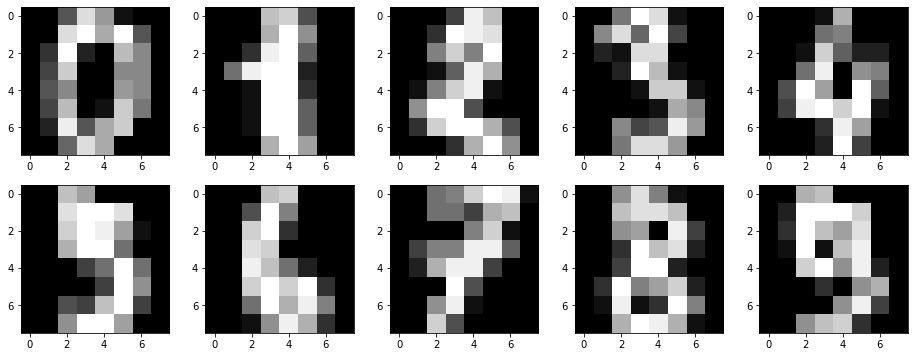

In [2]:
# Подготовка тренировочных данных
X, y = load_digits(return_X_y=True)
print(X.shape) # расскоментируйте, чтобы размер данных

# репрезентация данных
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]), cmap='gray')

In [3]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

In [4]:
# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [5]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

In [6]:
# вычисление сигмоид функции
def sigmoid(x):
    x = np.clip(x, a_min=-500, a_max=500)
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [7]:
Y = sigmoid(X)

In [19]:
# Обучение нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 20

# присваивание случайных весов
np.random.seed(1)
w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

# скорость обучения (learning rate)
learning_rate = 0.005

# количество итераций
num_epochs = 500

# массив для ошибок, чтобы потом построить график
errors = []
metrics = []

# процесс обучения
for i in range(num_epochs):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение (back propagation)
    # с использованием градиентного спуска
    layer2_error = layer2 - y_train  # производная функции потерь
    layer2_grad = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_grad.dot(w1.T)
    layer1_grad = layer1_error * sigmoid_deriv(layer1)
    
    w1 -= layer1.T.dot(layer2_grad) * learning_rate
    w0 -= layer0.T.dot(layer1_grad) * learning_rate
    
    # ошибка модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    
    # метрики качества
    preds = np.argmax(layer2, axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy = (preds == labels).sum() * 100 / len(labels)
    metrics.append(accuracy)

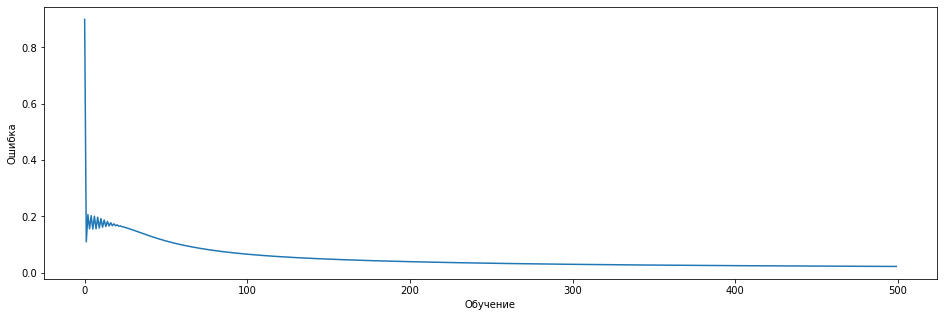

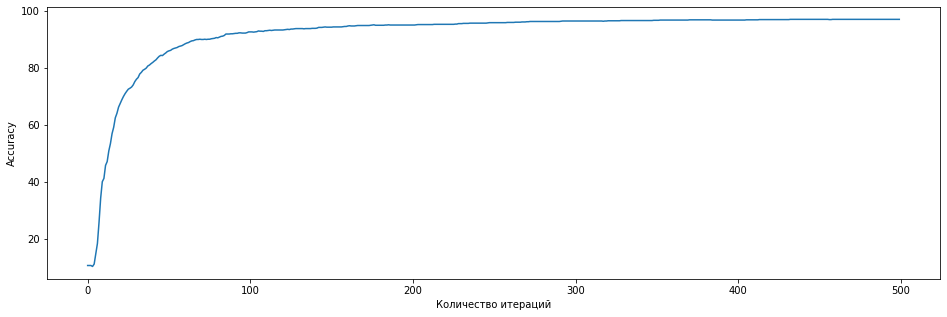

In [10]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

In [11]:
y_train[:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

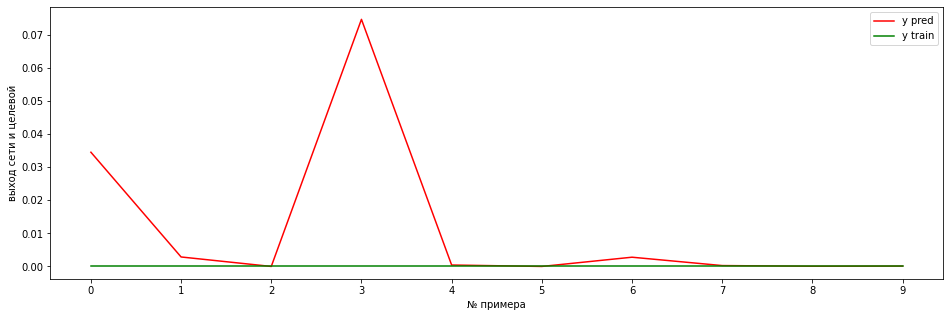

accuracy на обучении 97.09%


In [26]:
N = 10 #смотрим первые 10 объектов
label = 2 #смотрим вероятность выпадения (цифры_)
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()
        
print(f"accuracy на обучении {accuracy:.2f}%")

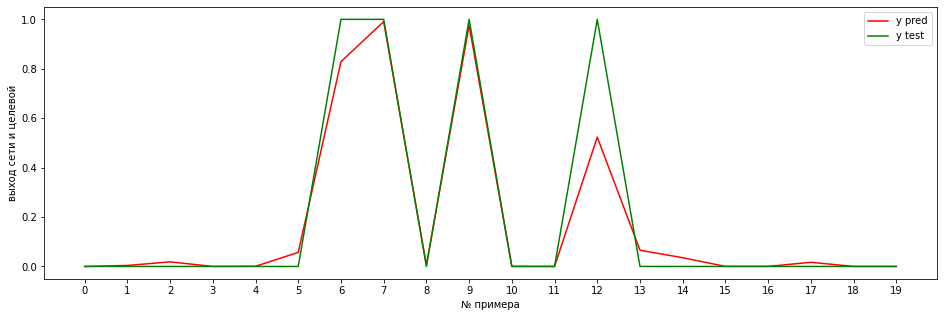

accuracy на тесте 94.78%


In [28]:
# прямое распространение(feed forward)
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
    
    
N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 2], 'r', label='y pred')
plt.plot(y_test[:N, 2], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

# метрика модели
preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")

1. Журнал подбора параметров двухслойной нейронной сети:

neuron_numb = 10   learning_rate 0,1 num_epochs = 100 точность - 63,13
neuron_numb = 15   learning_rate 0,1 num_epochs = 100 точность - 77,10
neuron_numb = 15   learning_rate 0,1 num_epochs = 200 точность - 80,47
neuron_numb = 15   learning_rate 0,1 num_epochs = 250 точность - 83,00
neuron_numb = 15   learning_rate 0,1 num_epochs = 300 точность - 85,02
neuron_numb = 15   learning_rate 0,01 num_epochs = 300 точность - 88,55
neuron_numb = 16   learning_rate 0,01 num_epochs = 300 точность - 86,70
neuron_numb = 15   learning_rate 0,01 num_epochs = 400 точность - 91,75
neuron_numb = 15   learning_rate 0,01 num_epochs = 500 точность - 90,40
neuron_numb = 15   learning_rate 0,01 num_epochs = 410 точность - 92,59
neuron_numb = 14   learning_rate 0,01 num_epochs = 410 точность - 92,09
neuron_numb = 15   learning_rate 0,005 num_epochs = 410 точность - 92,76
neuron_numb = 15   learning_rate 0,005 num_epochs = 420 точность - 92,93
neuron_numb = 15   learning_rate 0,005 num_epochs = 500 точность - 94,44


Ответы на вопросы:
2. К ухудшению точности нейронной сети может приводить как недостаточное, так и избыточное количество внутренних слоев нейронов;
Так же к ухудшению приводит низкое количество итераций и высокая скорость обучения (шаг).
3. К улучшению точности нейронной сети приводит баланс трех параметров: количество внутренних слоев нейронов, количество итераций и скорость обучения.